# Lec48_ヒストグラム

In [1]:
import numpy as np
from numpy.random import randn

import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

(array([  1.,   0.,   4.,   9.,  12.,  14.,  17.,  21.,  14.,   8.]),
 array([-3.74455755, -3.16224609, -2.57993462, -1.99762316, -1.41531169,
        -0.83300023, -0.25068876,  0.3316227 ,  0.91393417,  1.49624563,
         2.0785571 ]),
 <a list of 10 Patch objects>)

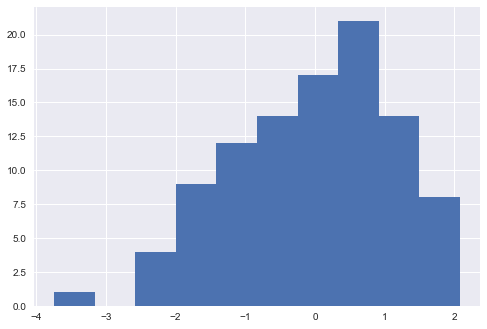

In [2]:
# 正規分布に従う乱数を発生させる
dataset1 = randn(100)
dataset2 = randn(80)
plt.hist(dataset1)

(array([  1.,   0.,   4.,   9.,  12.,  14.,  17.,  21.,  14.,   8.]),
 array([-3.74455755, -3.16224609, -2.57993462, -1.99762316, -1.41531169,
        -0.83300023, -0.25068876,  0.3316227 ,  0.91393417,  1.49624563,
         2.0785571 ]),
 <a list of 10 Patch objects>)

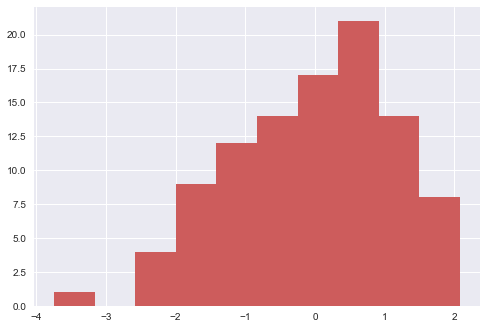

In [3]:
# 色を変更する
plt.hist(dataset1, color='indianred')

(array([ 0.01717294,  0.        ,  0.06869176,  0.15455646,  0.20607528,
         0.24042116,  0.29193998,  0.36063175,  0.24042116,  0.13738352]),
 array([-3.74455755, -3.16224609, -2.57993462, -1.99762316, -1.41531169,
        -0.83300023, -0.25068876,  0.3316227 ,  0.91393417,  1.49624563,
         2.0785571 ]),
 <a list of 10 Patch objects>)

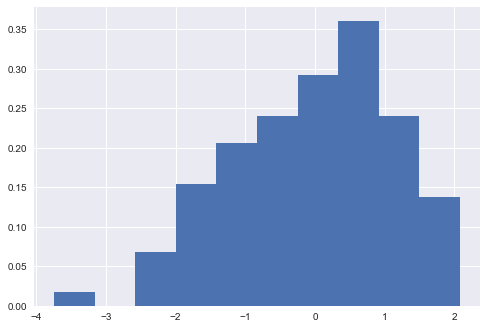

In [4]:
# 縦軸を確率に変える
plt.hist(dataset1, normed='True')

(array([ 0.10495059,  0.        ,  0.10495059,  0.15742588,  0.26237646,
         0.36732705,  0.26237646,  0.62970351,  0.15742588,  0.26237646,
         0.36732705,  0.47227763,  0.26237646,  0.15742588,  0.10495059,
         0.10495059,  0.20990117,  0.15742588,  0.        ,  0.05247529]),
 array([-2.1385359 , -1.90032856, -1.66212122, -1.42391388, -1.18570653,
        -0.94749919, -0.70929185, -0.4710845 , -0.23287716,  0.00533018,
         0.24353753,  0.48174487,  0.71995221,  0.95815955,  1.1963669 ,
         1.43457424,  1.67278158,  1.91098893,  2.14919627,  2.38740361,
         2.62561096]),
 <a list of 20 Patch objects>)

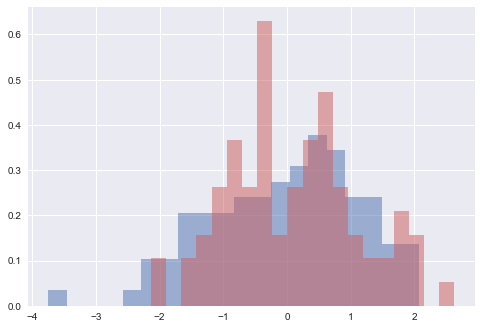

In [5]:
# 二つの棒グラフを重ねてプロットする
plt.hist(dataset1,normed=True,alpha=0.5,bins=20)
plt.hist(dataset2,normed=True,alpha=0.5,bins=20,color='indianred')

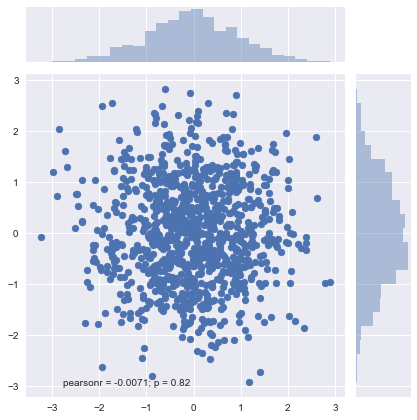

In [6]:
data1 = randn(1000)
data2 = randn(1000)
# 結合分布
sns.jointplot(data1,data2)

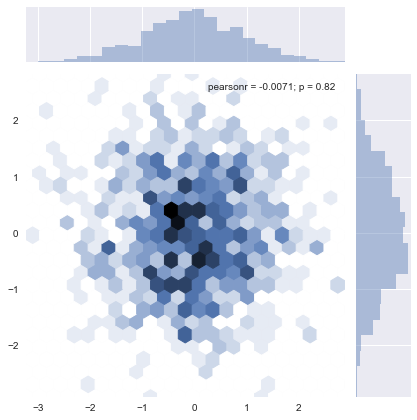

In [7]:
# プロットをヘキサ型に変更
sns.jointplot(data1,data2,kind='hex')

# Lec49_カーネル密度推定

In [8]:
import numpy as np
from numpy.random import randn

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [9]:
dataset = randn(25)
dataset

array([-0.5295415 , -0.6308017 , -0.6915488 ,  0.13437399, -1.82823999,
       -0.07808064,  1.21188224,  0.38848151,  0.45396587,  0.68895137,
        2.78287191,  0.55255559, -1.16755478,  0.59797064, -0.71929647,
       -0.2636775 ,  0.34237794,  0.71545641,  2.06317639,  0.56191274,
        0.32966455, -0.99289145, -0.56195176,  0.4343357 , -1.41075698])

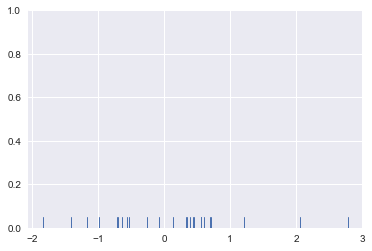

In [10]:
# Rugplot
sns.rugplot(dataset)
# plt.ylim(0,1)

(array([ 2.,  2.,  5.,  2.,  6.,  5.,  1.,  0.,  1.,  1.]),
 array([-1.82823999, -1.3671288 , -0.90601761, -0.44490642,  0.01620477,
         0.47731596,  0.93842715,  1.39953834,  1.86064953,  2.32176072,
         2.78287191]),
 <a list of 10 Patch objects>)

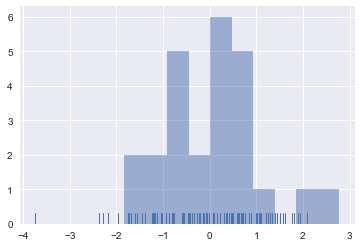

In [11]:
# ヒストグラムを追加する
sns.rugplot(dataset1)
plt.hist(dataset,alpha=0.5)

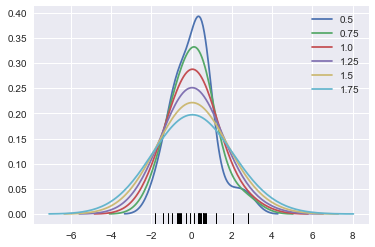

In [12]:
# バンド幅を変更する
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2.0,0.25):
    sns.kdeplot(dataset,bw=bw,label=bw)

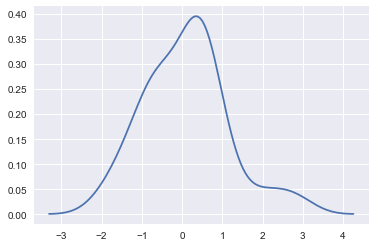

In [13]:
# カーネル密度推定を描画する
sns.kdeplot(dataset)

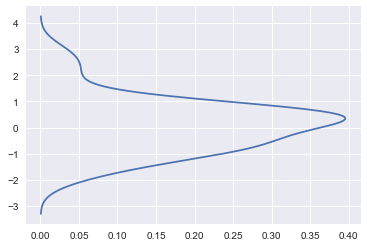

In [14]:
# 軸を入れ替える
sns.kdeplot(dataset, vertical=True)

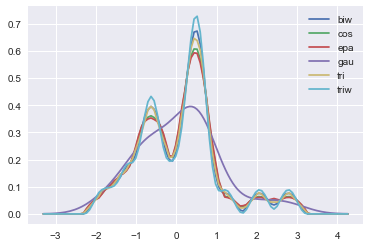

In [15]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

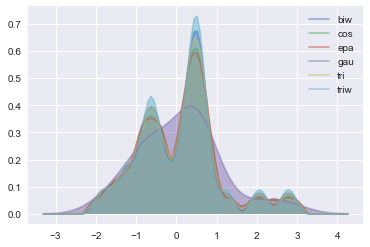

In [16]:
# 半透明で着色する
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

(array([  2.,   4.,   9.,  11.,  17.,  22.,  23.,  23.,  24.,  25.]),
 array([-1.82823999, -1.3671288 , -0.90601761, -0.44490642,  0.01620477,
         0.47731596,  0.93842715,  1.39953834,  1.86064953,  2.32176072,
         2.78287191]),
 <a list of 10 Patch objects>)

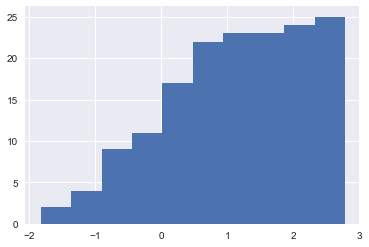

In [17]:
# 累積分布関数を描画する
plt.hist(dataset, cumulative=True)

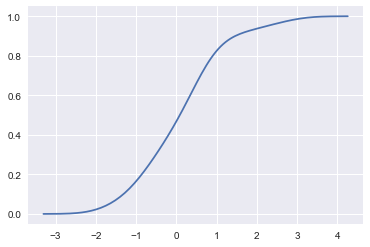

In [18]:
# 累積分布関数を
sns.kdeplot(dataset, cumulative=True)

### 二次元の正規分布

In [19]:
# 2次元平面の中心を定義
mean = [0,0]

In [20]:
# それぞれの軸方向の分散を定義
cov = [[1,0],[0,100]]

In [21]:
# 上記条件に沿った、多変量積分布のデータをデータフレーム化
dataset2 = np.random.multivariate_normal(mean,cov,1000)
dataset2

array([[ -1.43556374e+00,  -1.09956388e+01],
       [ -6.00988965e-02,   4.01931253e+00],
       [  1.07361662e-03,   6.57625651e+00],
       ..., 
       [ -1.73877235e+00,  -1.50463014e+01],
       [ -9.56634989e-02,   5.71225757e+00],
       [ -4.01472944e-01,  -5.57963727e+00]])

In [22]:
dframe= pd.DataFrame(dataset2,columns=['X','Y'])
dframe

,X,Y
0,-1.435564,-10.995639
1,-0.060099,4.019313
2,0.001074,6.576257
3,0.251608,-2.126771
4,-0.662476,-20.892236
5,-1.295830,-0.589955
6,0.577687,-4.147184
7,-0.149097,-15.179210
8,-0.927746,15.584345
9,1.424852,5.365943


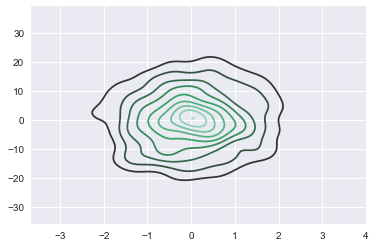

In [23]:
sns.kdeplot(dframe)

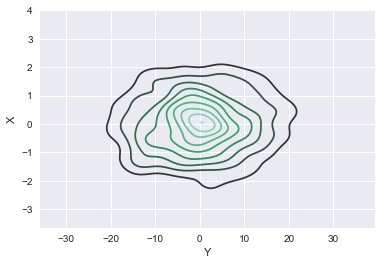

In [24]:
# 軸を入れ替えてデータを渡す
sns.kdeplot(dframe.Y,dframe.X)

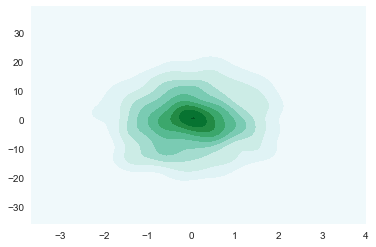

In [25]:
# グラフを着色する
sns.kdeplot(dframe,shade=True)

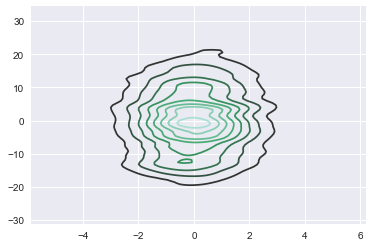

In [26]:
# バンド幅を変更する
sns.kdeplot(dframe,bw=1)

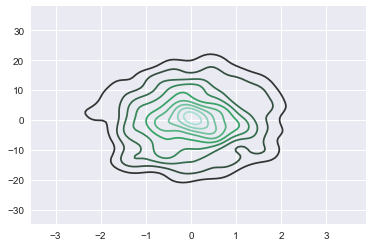

In [27]:
# 文字列でバンド幅を変更する
sns.kdeplot(dframe,bw='silverman')

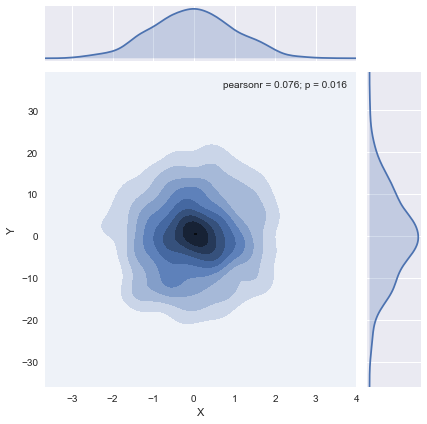

In [28]:
# 同時分布の推定
sns.jointplot('X','Y',dframe,kind='kde')

# Lec50_分布の可視化

In [29]:
from numpy.random import randn
import seaborn as sns

%matplotlib inline

In [30]:
# 正規分布に従う100個の乱数を発生させる
dataset = randn(100)
dataset

array([-0.14701225, -0.16292575, -0.64959033,  0.87190674, -1.4701875 ,
        0.07179622,  0.06670281, -0.3692029 , -1.05220174, -0.43445817,
        0.49939464,  0.51333064,  0.98446937, -0.86937147,  0.14767493,
        1.07669126, -0.28950661, -0.65019453,  0.55613991,  0.65378405,
        0.61905639,  0.50790067, -0.67640439,  0.86110586, -0.55043774,
       -0.69772924, -1.59104998,  0.83820488,  0.93889499, -1.04307987,
        0.8132225 ,  2.63850611, -1.23618102, -0.47077518, -0.5905296 ,
       -1.32229647, -0.63709558,  1.61211389,  2.04497881,  0.12144754,
       -0.3164022 , -1.06974384,  0.56166812, -0.38535082, -0.85791965,
        0.97647176,  0.70296567, -0.30005332, -0.03267694, -0.17874983,
       -1.45405753, -1.47812141, -1.18307665, -1.06760765,  0.24595621,
        0.9076839 ,  0.96320996,  0.62047324, -1.33597296,  1.36717389,
        0.67626539, -0.16615728,  0.30435587,  0.27415187,  0.05547153,
        0.33682618, -0.71695847,  1.30759237, -2.1468763 , -1.57

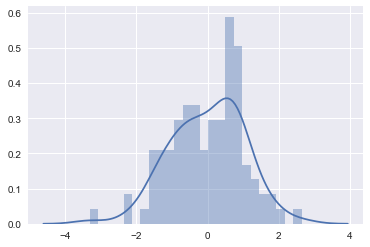

In [31]:
# カーネル密度推定とヒストグラムを描画する
sns.distplot(dataset, bins=25)

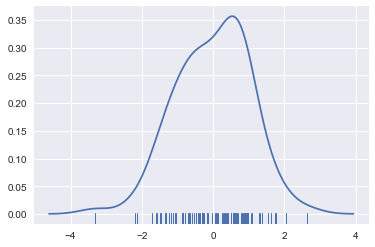

In [32]:
# ヒストグラムの代わりにRagプロットを描画する
sns.distplot(dataset, rug=True, hist=False)

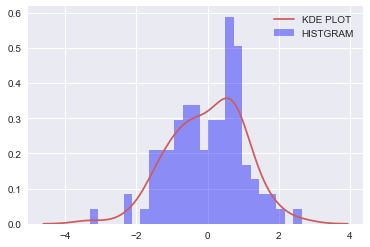

In [33]:
# グラフのスタイルを変更する
sns.distplot(dataset,bins=25,
             kde_kws={'color':'indianred', 'label':'KDE PLOT'},
             hist_kws={'color':'blue', 'label':"HISTGRAM"})

In [34]:
from pandas import Series

In [35]:
# ArrayをSeries化して描画する
ser1 = Series(dataset, name='My_DATA')

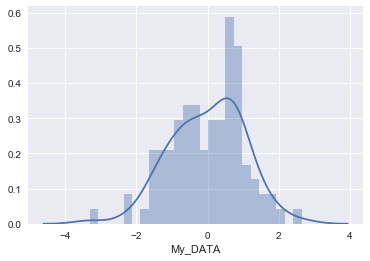

In [36]:
# pandasのSeriesをdistplotで描画する
sns.distplot(ser1,bins=25)

# Lec51_ボックスプロットとヴァイオリンプロット

In [37]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [38]:
# 正規分布に従う二つの乱数を発生させる
data1 = randn(100)
data1

array([ 1.55904266, -0.37740146,  0.33302883, -2.93906063, -1.68275164,
       -1.05257518,  0.64463216,  0.14091446,  2.36977248,  0.37103501,
       -0.62723347, -2.02856464,  0.6964852 , -0.51256728, -0.21718027,
        1.08760718,  1.66526878, -0.08124103,  1.18851513,  0.3198825 ,
        0.22515252, -1.49725178,  0.15347868, -0.07153743, -0.87993114,
       -0.34959308,  0.23712517, -0.87893095, -0.45749678, -1.32314456,
       -0.62998905, -0.54098938, -0.16010643, -0.26933746,  0.23792847,
        1.32300642,  0.95782289,  2.30202581, -0.19394295,  0.23232766,
       -1.03071876, -0.63159575, -0.53188605, -1.11336828,  0.60210784,
       -0.26450706, -0.18623497, -0.02569615,  0.1954447 ,  1.43827099,
       -0.6853278 , -0.30794783,  1.07006396,  1.03124216, -0.33264711,
        1.63690125, -0.55470077, -1.45845412,  0.2860874 , -1.11231622,
       -2.36988433,  0.47399701,  1.85951089,  1.1710561 ,  2.21389884,
       -1.33501106,  0.27951358, -0.84540037,  1.26358174,  0.11

In [39]:
data2 = randn(100) + 2
data2

array([ 1.14748595,  1.99461653,  1.78926961,  0.88809307,  3.17314671,
        1.89871871,  3.85333818,  2.45536053,  0.86719798,  2.17304468,
        3.60493481,  1.56933718,  3.56036827,  0.58744575,  1.89595587,
        1.29975833,  2.84209764,  2.11055295,  1.71548033,  3.68025077,
        1.62644849,  1.80531035,  1.02489325,  2.82135782,  2.36812824,
        1.84290558,  2.31703461,  1.39317788,  3.4439978 ,  0.86328834,
        1.9824907 ,  2.50827606,  1.90319716,  3.13649241,  1.76364848,
        2.78410234,  2.33261816,  1.57400318,  0.74776522,  2.12157531,
        1.65744767,  3.26627272,  2.33218497,  1.27557357,  2.49087069,
        2.10965466,  1.70601548,  1.85241331,  3.27219747,  3.06593135,
        2.30989949,  1.80373634,  0.42003989,  0.0371818 , -0.30940011,
        2.69862247,  1.96648781,  2.05049758,  2.19788595,  3.597512  ,
        1.28379692,  2.68074858,  0.40106722,  1.63527858,  2.71194189,
        1.76942421,  1.90284131,  2.67720297,  1.92755446,  2.07

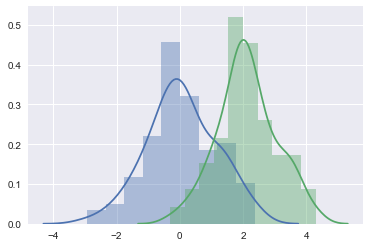

In [40]:
# distplotでカーネル密度推定とヒストグラムを描画する
sns.distplot(data1)
sns.distplot(data2)

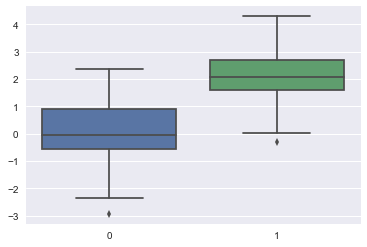

In [41]:
# boxplotで描画する
sns.boxplot(data=[data1,data2])

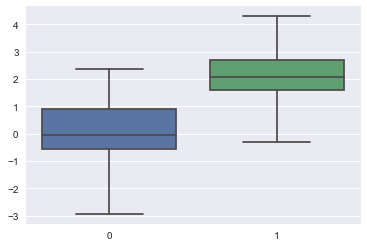

In [42]:
# boxplotで描画する(外れ値を含む)
sns.boxplot(data=[data1,data2], whis=np.inf)

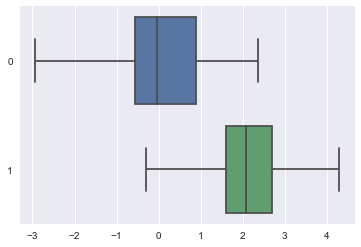

In [43]:
# 軸を入れ替える
sns.boxplot(data=[data1,data2], whis=np.inf, orient = 'h')

In [44]:
# 正規分布に従う乱数を発生させる
data1 = stats.norm(0,5).rvs(100)
data1

array([  5.16936595,   3.64347527,  -0.21069909,  -1.87221972,
        -0.65034231, -12.73681958,  14.70290434,  -6.30199238,
        -3.22828501,  -1.50866097,  10.89637507,   2.68463663,
        -5.59096764,  -1.58419836,   4.39060541,   4.78744825,
        -4.71177681,   1.73056215,  -1.19076377,   1.31635817,
        -4.77466151,  10.36450947,  -7.09978492,  -2.52875377,
         1.68711423,  -1.31659235,   3.29036381,  -3.55034308,
        -1.75934412,   0.67545498,  -6.08124583,  -0.85003758,
         3.37532433,   2.55996516,  -0.87172111,   0.43499724,
        -5.81471367,  -2.51416067,  -0.30875122,  -2.00351091,
        -9.58989108,  13.05369529,   2.55812989,  -0.61338649,
         3.16781615,   9.02396131,   7.88313124,  -1.78743706,
         3.7708632 ,  -1.9382384 ,  -2.18403711,   6.30657492,
        -5.08997201,   5.29936973,   9.56996501,   1.19177325,
         2.71987855,  -1.60193462,   2.62337794,  -5.83952742,
         2.42477209,  -7.85379   ,   4.56914525,   2.43

In [45]:
# γ分布に従う乱数を発生させる
data2 = np.concatenate([stats.gamma(5).rvs(50) - 1,
                        -1 * stats.gamma(5).rvs(50)])
data2

array([  1.72635188,   6.80906179,   2.28561787,   6.73343399,
         3.87597267,   6.80131851,   4.78192863,   2.12180126,
         0.42254471,   7.02348279,   0.91806059,   5.65241206,
         6.70288528,   3.27285613,   2.69387899,   3.86258701,
         1.14442691,   2.44228125,   3.96759436,   0.51655313,
         4.22502069,   1.60408292,   1.39034804,   2.2912566 ,
         8.53688263,   2.4469894 ,   2.40301573,   0.95559712,
         3.29146748,   5.72240989,   3.00079135,   6.18663729,
         1.4705611 ,   1.04769646,   2.83669722,   5.00557505,
         3.15122839,   5.08325476,   4.62011805,   9.03459506,
         4.1539908 ,   3.57758502,   4.48523067,   3.25215173,
         4.19993796,   3.43036049,   6.96471471,   4.2293406 ,
         3.75053531,   3.11346333,  -6.46446287,  -7.00233578,
        -2.11551331,  -2.41537195,  -4.69550094,  -6.27011624,
        -2.85808704,  -5.22505131,  -4.68464807,  -6.3223903 ,
        -2.77487897,  -7.74939756,  -3.39550932,  -9.93

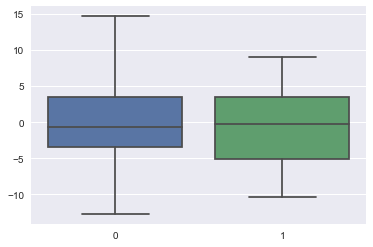

In [46]:
# ボックスプロットで描画する
sns.boxplot(data=[data1,data2],whis=np.inf)

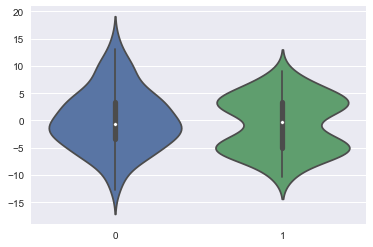

In [47]:
# ヴァイオリンプロットで描画する
sns.violinplot(data=[data1,data2])

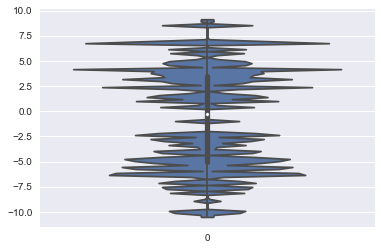

In [48]:
# バンド幅を細かくして見る
sns.violinplot(data=data2, bw=0.01)

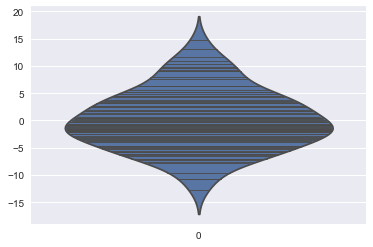

In [49]:
# Rugプロットのような描画？？？
sns.violinplot(data=data1, inner="stick")

# Lec52_回帰とプロット

In [50]:
import numpy as np
from numpy.random import randn

import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [51]:
# Seabornのサンプルデータを使用する
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot
http://seaborn.pydata.org/generated/seaborn.lmplot.html

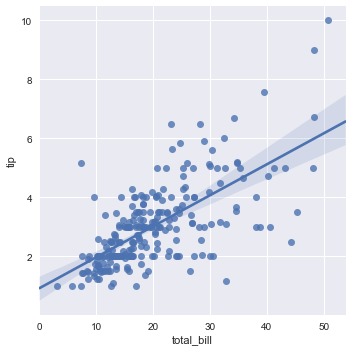

In [52]:
# lmplotで描画する
sns.lmplot("total_bill","tip", tips)

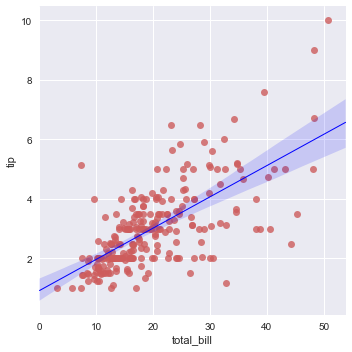

In [53]:
# パラメータでプロットを編集
sns.lmplot("total_bill","tip", tips,
           scatter_kws={'marker':'o', 'color':'indianred'},
           line_kws={'linewidth':1, 'color':'blue'})

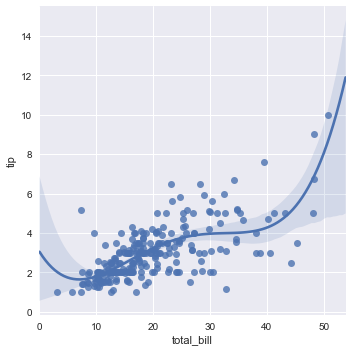

In [54]:
# ４次関数の回帰曲線をプロット
sns.lmplot("total_bill", "tip", tips, order=4)

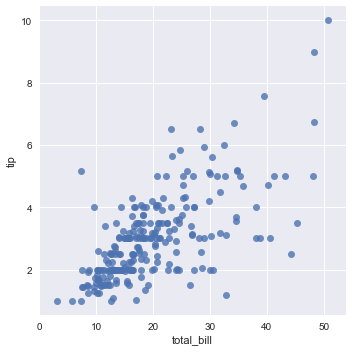

In [55]:
# 単純なプロット
sns.lmplot("total_bill", "tip", tips, fit_reg=False)

In [56]:
# tipの割合を計算する
tips["tip_pect"] = 100*(tips['tip']/tips['total_bill'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


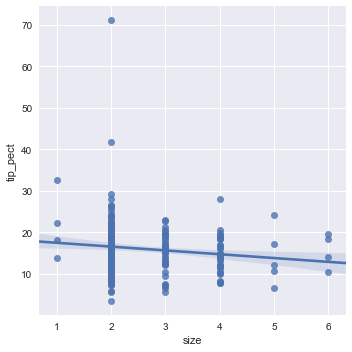

In [57]:
sns.lmplot("size", "tip_pect", tips)

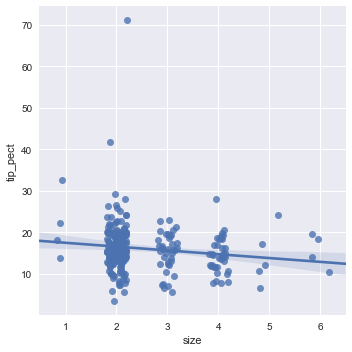

In [58]:
sns.lmplot("size", "tip_pect", tips, x_jitter=0.2)